In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

**Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code**

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [5]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san-pedro
Processing Record 2 of Set 1 | mukhorshibir'
City not found. Skipping...
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | ar rumaythah
Processing Record 5 of Set 1 | pandan
Processing Record 6 of Set 1 | mana
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | margate
Processing Record 9 of Set 1 | lichtenburg
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | urucara
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | les anglais
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | alesund

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [16]:
#change max temp from Kelvin to Celcius

city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san-pedro,4.7485,-6.6363,27.45,80,97,4.69,CI,1682106635
1,margaret river,-33.9500,115.0667,13.58,92,11,4.02,AU,1682106636
2,ar rumaythah,31.5263,45.2025,25.83,35,11,5.41,IQ,1682106637
3,pandan,14.0453,124.1694,25.65,85,94,2.46,PH,1682106637
4,mana,5.6592,-53.7767,26.02,88,100,3.69,GF,1682106638


**Create the Scatter Plots Requested**
Latitude Vs. Temperature

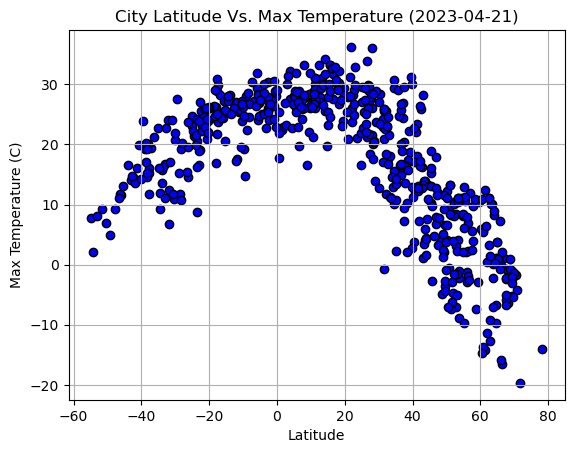

In [18]:
# Build scatter plot for latitude vs. temperature

x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']

plt.scatter(x_lat, y_temp, color='b', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Max Temperature (2023-04-21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
x_lat = city_data_df['Lat']
y_humid = city_data_df['Humidity']

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_lat = city_data_df['Lat']
y_cloud = city_data_df['Cloudiness']

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_lat = city_data_df['Lat']
y_wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

**Requirement 2: Compute Linear Regression for Each Relationship**

In [20]:
#copy city_data_df and change the latitudes to absolute value for use in linear regression

abs_lat_city_data_df = city_data_df.copy()
abs_lat_city_data_df['Lat'] = abs_lat_city_data_df['Lat'].abs()


0.0583

In [ ]:
# Define a function to create Linear Regression plots

def l_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    reg_line = slope*x + intercept
    plt.scatter(x, y)


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()